In [299]:
import os, json
import pandas as pd

path_to_json = '/Users/alealcoforado/Documents/resultados/drive-download-20230610T201909Z-001/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if (pos_json.endswith('.json') and 'hyperparameters' not in pos_json)]
# print(json_files)  # for me this prints ['foo.json']
print(json_files)
hyperp_files = [pos_json for pos_json in os.listdir(path_to_json) if (pos_json.endswith('.json') and 'hyperparameters' in pos_json)]

# filename = ['ag_news_2023-06-06 18:45:54.131604.json']

['ag_news_2023-06-10 02_58_29.345765.json', 'ag_news_2023-06-10 02_49_23.544545.json', 'CR_2023-06-09 22_09_32.352174.json', 'CR_2023-06-09 22_21_21.606954.json', 'ag_news_2023-06-09 23_05_15.913341.json', 'CR_2023-06-10 02_06_11.403297.json', 'CR_2023-06-09 17_27_23.070349.json', 'CR_2023-06-09 21_34_48.009868.json', 'CR_2023-06-10 02_25_19.761125.json', 'CR_2023-06-10 01_48_23.391398.json', 'CR_2023-06-10 02_51_29.484733.json', 'CR_2023-06-09 22_13_34.577293.json', 'CR_2023-06-09 21_59_03.372169.json', 'CR_2023-06-09 21_12_56.885050.json', 'ag_news_2023-06-10 02_14_03.001078.json', 'ag_news_2023-06-10 02_30_35.387109.json', 'ag_news_2023-06-10 03_43_53.389854.json', 'ag_news_2023-06-09 23_46_13.581205.json', 'CR_2023-06-10 02_13_38.954495.json', 'ag_news_2023-06-09 23_15_42.867939.json', 'ag_news_2023-06-10 03_17_42.419046.json', 'CR_2023-06-10 02_59_00.060427.json', 'CR_2023-06-10 02_45_35.240062.json', 'CR_2023-06-10 02_03_54.576183.json', 'CR_2023-06-10 02_49_42.459007.json', 'ag_

['CR_hyperparameters_2023-06-10 02_49_42.459007.json',
 'CR_hyperparameters_2023-06-10 02_03_54.576183.json',
 'CR_hyperparameters_2023-06-10 02_17_05.069696.json',
 'ag_news_hyperparameters_2023-06-10 02_58_29.345765.json',
 'ag_news_hyperparameters_2023-06-10 02_49_23.544545.json',
 'CR_hyperparameters_2023-06-09 21_32_51.576014.json',
 'CR_hyperparameters_2023-06-10 02_02_03.309676.json',
 'CR_hyperparameters_2023-06-09 21_59_03.372169.json',
 'CR_hyperparameters_2023-06-09 21_12_56.885050.json',
 'ag_news_hyperparameters_2023-06-09 23_05_15.913341.json',
 'CR_hyperparameters_2023-06-10 02_59_00.060427.json',
 'CR_hyperparameters_2023-06-10 02_45_35.240062.json',
 'CR_hyperparameters_2023-06-10 02_13_38.954495.json',
 'CR_hyperparameters_2023-06-10 02_06_11.403297.json',
 'CR_hyperparameters_2023-06-09 21_04_00.068544.json',
 'CR_hyperparameters_2023-06-09 22_21_21.606954.json',
 'ag_news_hyperparameters_2023-06-09 23_46_13.581205.json',
 'ag_news_hyperparameters_2023-06-10 03_43_53

In [311]:
# pd.read_json(path_to_json+ hyperp_files[3]).to_dict('records')


{'model_name_or_path': 'sentence-transformers/paraphrase-mpnet-base-v2',
 'dataset': 'SetFit/ag_news',
 'train_dataset_size': 5000,
 'random_seed': 42,
 'dataset_train_split': 'train',
 'dataset_test_split': 'test',
 'hypothesis_template': '{}',
 'multi_target_strategy': None,
 'use_differentiable_head': False,
 'num_iterations': 20,
 'num_setfit_iterations': 3,
 'num_epochs': 2,
 'samples_per_label': 4,
 'normalize_embeddings': False,
 'selection_strategy': 'top_n',
 'batch_size': 16,
 'var_samples_per_label': [16, 16, 16],
 'var_selection_strategy': ['intraclass_clustering',
  'intraclass_clustering',
  'intraclass_clustering'],
 'learning_rate': 2e-05,
 'body_learning_rate': 1e-05,
 'num_body_epochs': 1,
 'freeze_head': False,
 'freeze_body': False,
 'train_first_shot': True,
 'allow_resampling': False}

In [230]:
def get_metric_from_json(j):
    try:
        return j['accuracy']
    except:
        return j
    

df_jsons=pd.DataFrame([])
for j in json_files:
    # print(j)
    filepath = path_to_json+j
    this_df = pd.read_json(filepath)
    unsup_cols = [col for col in this_df.columns if ('unsup' in col)]
    sup_cols = [col for col in this_df.columns if ( 'unsup' not in col)]
    this_df = this_df.drop(unsup_cols,axis=1).stack()
    
    this_df[(1,'experiment_name')] = j
    this_df.index = this_df.index.get_level_values(1)
    

    this_df = pd.DataFrame(dict(zip(this_df.index,this_df.values)))[:1] ## only weighted
    df_jsons = pd.concat([df_jsons,this_df],axis=0)
    



df_metrics = df_jsons.reset_index(drop=True).apply(lambda row: row.apply(lambda x: get_metric_from_json(x)))
df_metrics.experiment_name.drop_duplicates()

0      ag_news_2023-06-10 02_58_29.345765.json
1      ag_news_2023-06-10 02_49_23.544545.json
2           CR_2023-06-09 22_09_32.352174.json
3           CR_2023-06-09 22_21_21.606954.json
4      ag_news_2023-06-09 23_05_15.913341.json
                        ...                   
132         CR_2023-06-09 21_27_31.409199.json
133         CR_2023-06-09 21_06_19.049436.json
134         CR_2023-06-10 02_23_58.541414.json
135    ag_news_2023-06-10 00_00_01.120315.json
136         CR_2023-06-09 21_20_06.658890.json
Name: experiment_name, Length: 137, dtype: object

{'model_name_or_path': 'sentence-transformers/paraphrase-mpnet-base-v2',
 'dataset': 'SetFit/CR',
 'train_dataset_size': 3394,
 'random_seed': 42,
 'dataset_train_split': 'train',
 'dataset_test_split': 'test',
 'hypothesis_template': '{}',
 'multi_target_strategy': None,
 'use_differentiable_head': False,
 'num_iterations': 20,
 'num_setfit_iterations': 3,
 'num_epochs': 1,
 'samples_per_label': 4,
 'normalize_embeddings': False,
 'selection_strategy': 'top_n',
 'batch_size': 16,
 'var_samples_per_label': [8, 8, 8],
 'var_selection_strategy': ['intraclass_clustering',
  'intraclass_clustering',
  'intraclass_clustering'],
 'learning_rate': 2e-05,
 'body_learning_rate': 1e-05,
 'num_body_epochs': 1,
 'freeze_head': False,
 'freeze_body': False,
 'train_first_shot': True,
 'allow_resampling': False}

40
10


/var/folders/7y/gs417t9903j0mfts88nkph_h0000gn/T/ipykernel_28784/2432202147.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = subplots(1,1,figsize=(4,3))


<Figure size 640x480 with 0 Axes>

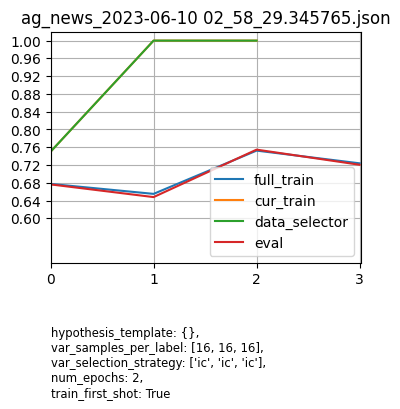

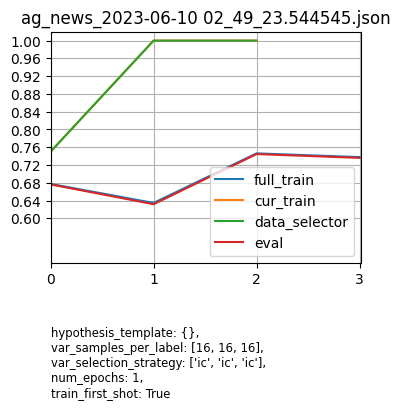

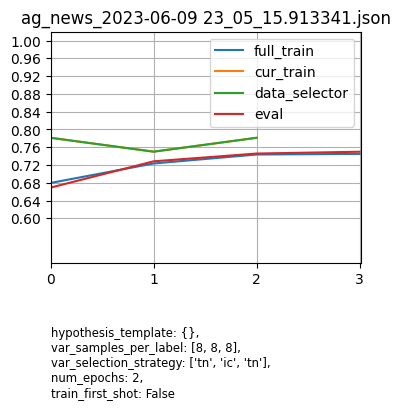

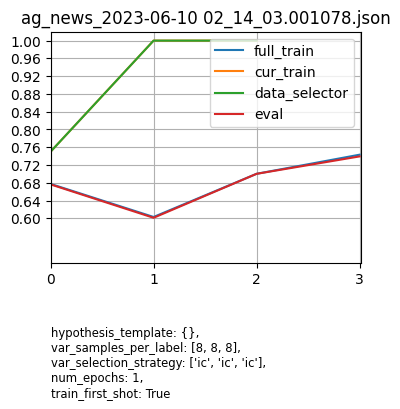

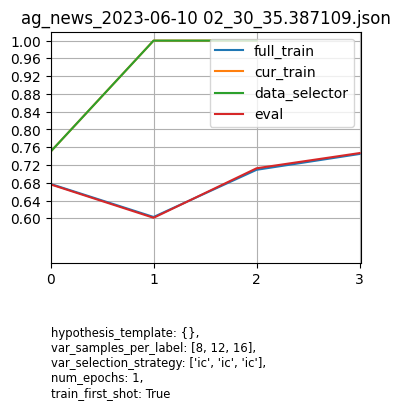

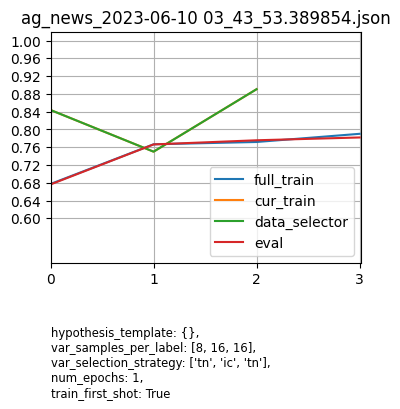

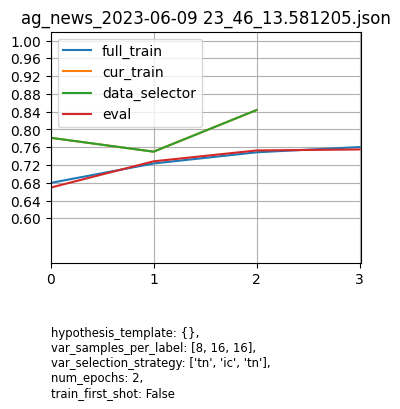

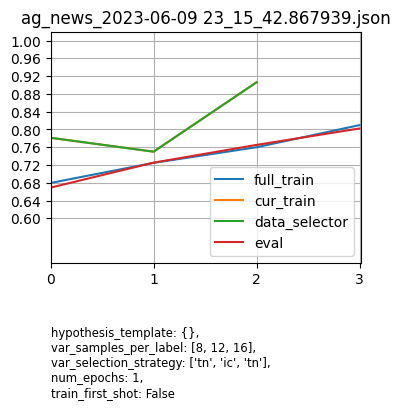

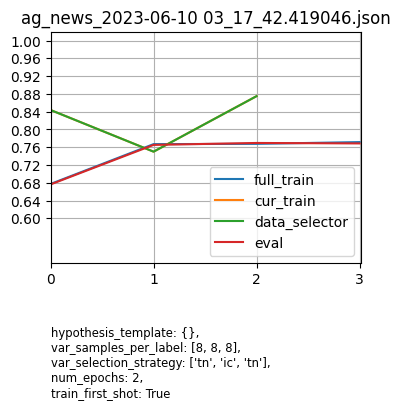

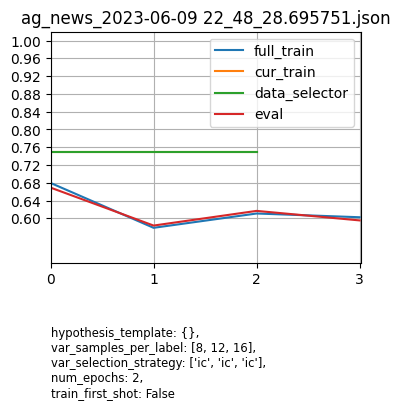

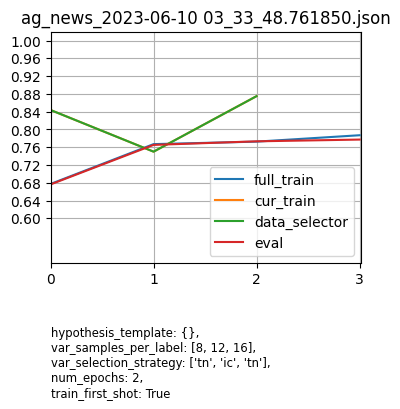

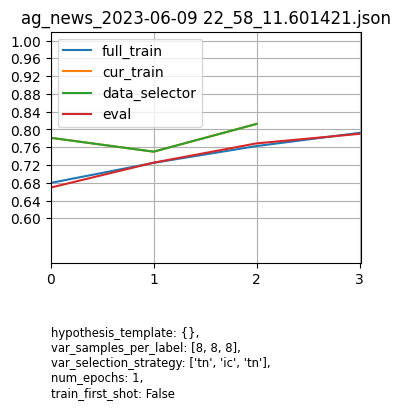

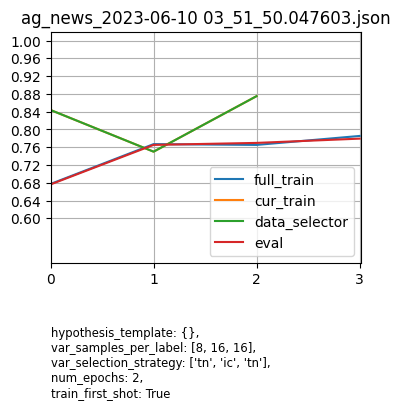

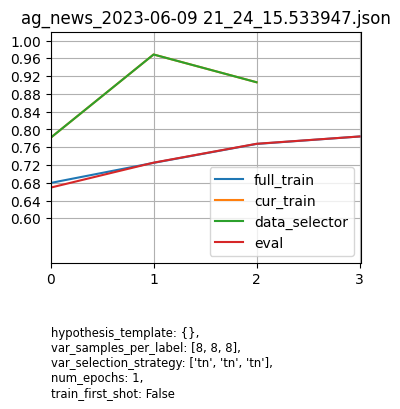

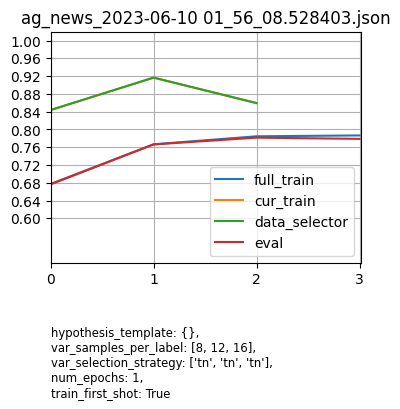

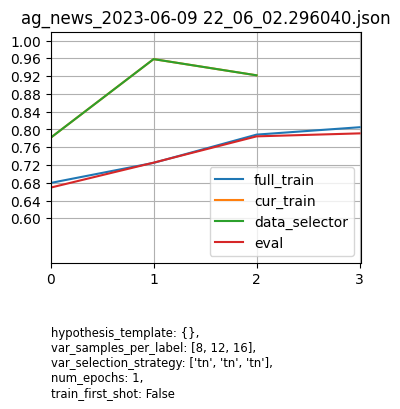

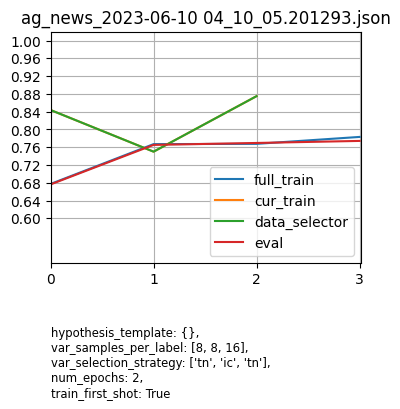

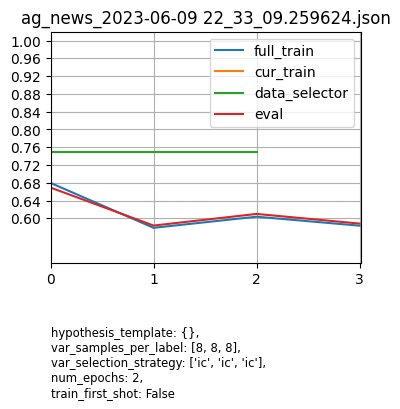

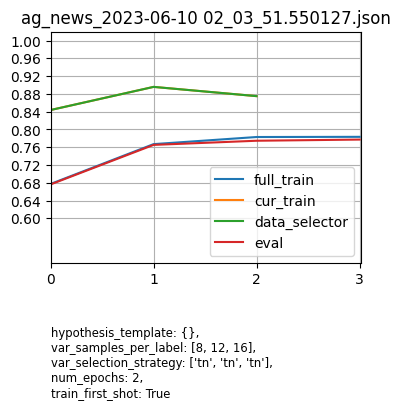

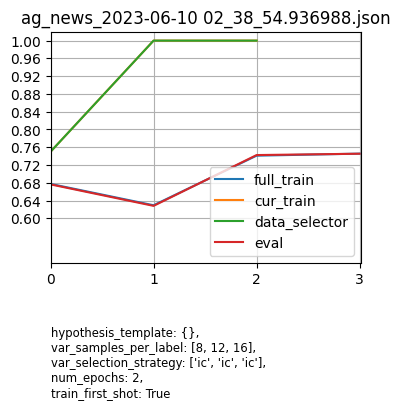

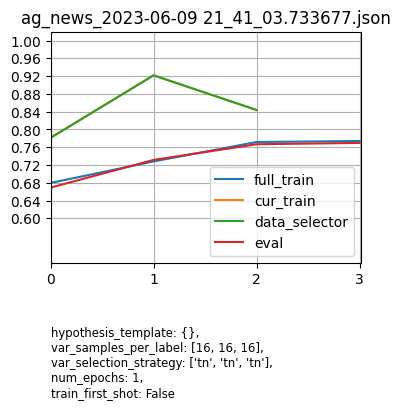

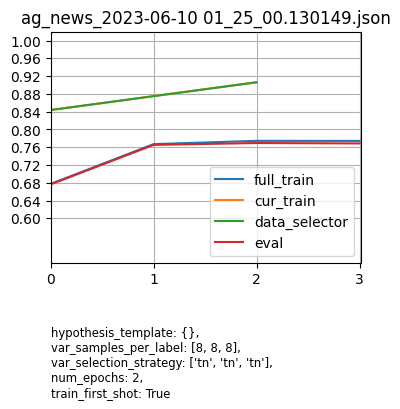

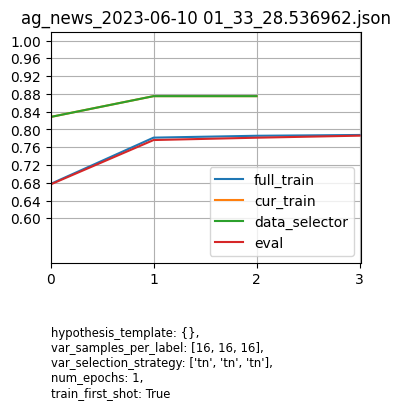

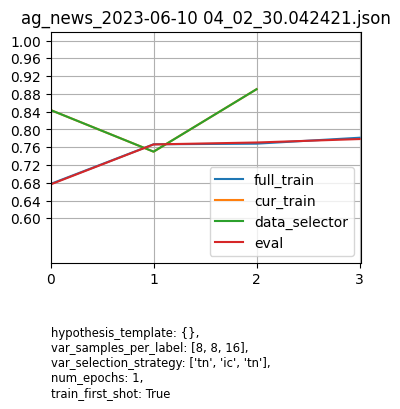

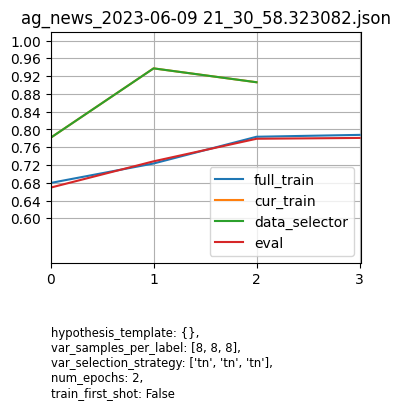

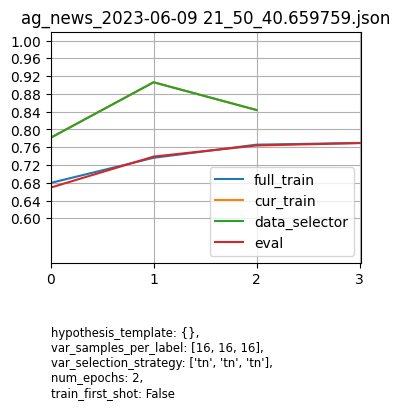

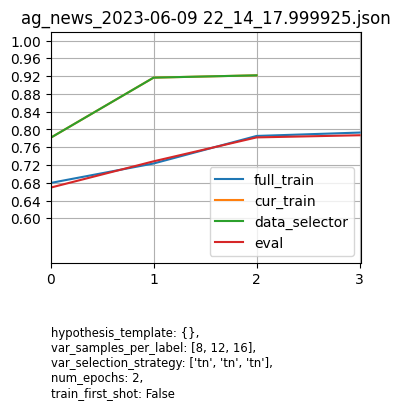

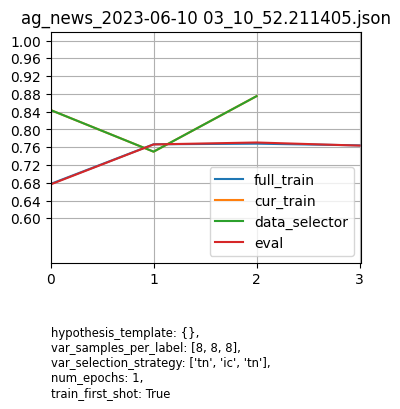

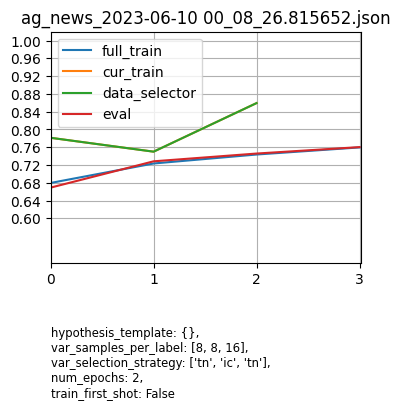

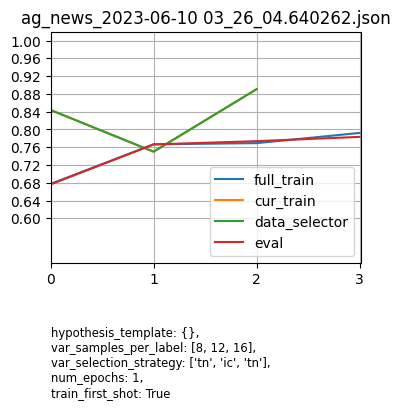

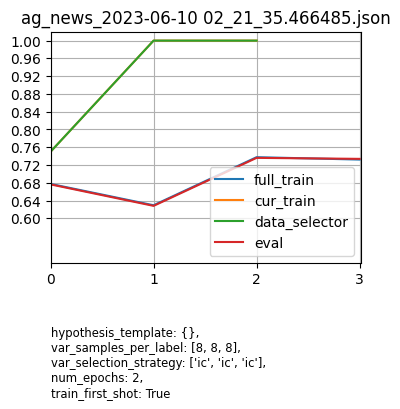

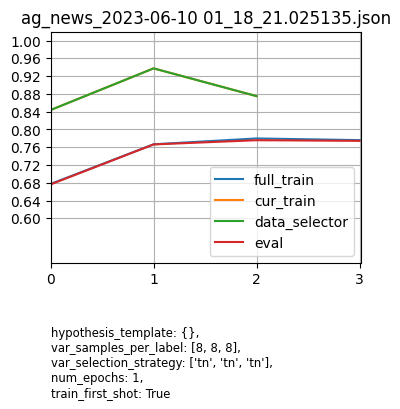

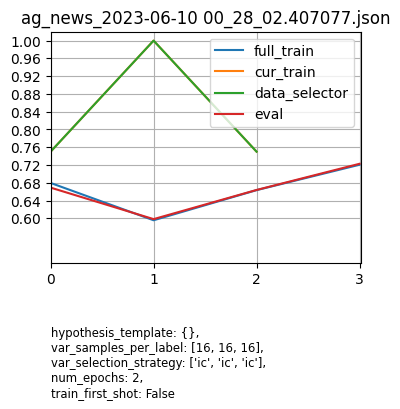

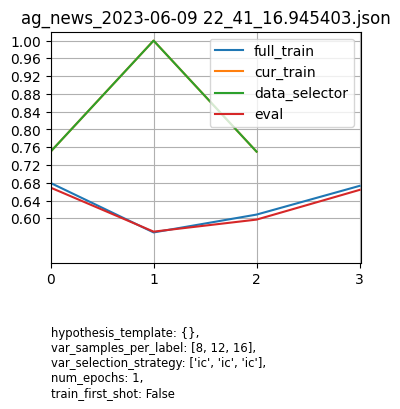

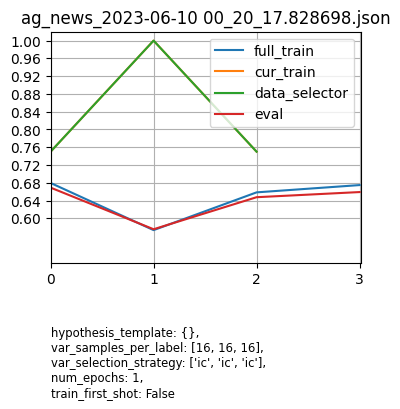

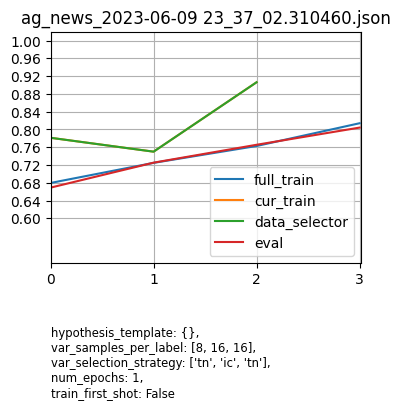

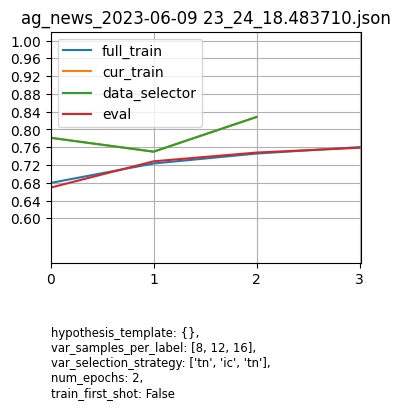

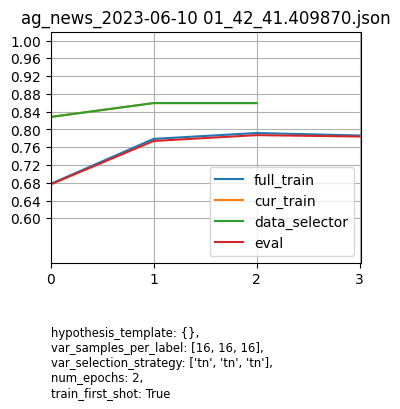

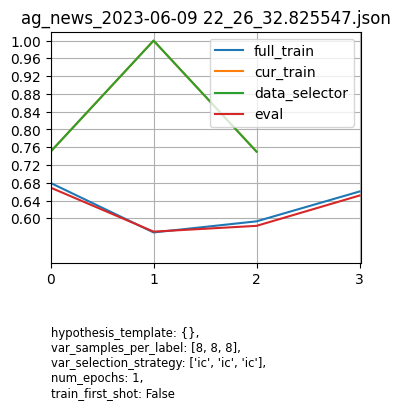

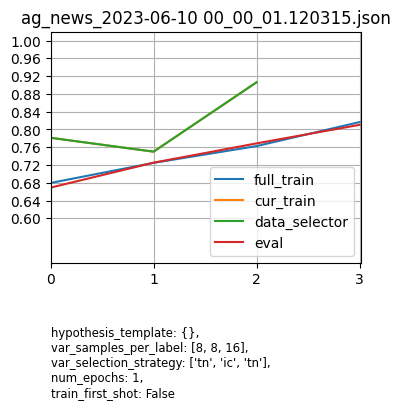

In [387]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
exp_name = 'ag_news'
df_metrics_dataset = df_metrics[df_metrics['experiment_name'].str.contains(exp_name)].reset_index(drop=True)

import re


subplots_adjust(bottom=5,top=10,hspace=0.000)
number_of_subplots=len(df_metrics_dataset)
print(number_of_subplots)
n_cols=4
n_linhas = round(number_of_subplots/n_cols)
print(n_linhas)
lin=1
col=1

for exp in range(len(df_metrics_dataset)):
    this_df = df_metrics_dataset.loc[exp]
    r = re.search(re.compile(r'_\d{1}.{20,30}.json'),this_df['experiment_name'])
    r = exp_name+"_hyperparameters"+r[0]

    try:
        f = open(path_to_json+ r,'r')
        hyperparams = ((json.load(f)))

    except:
        print(f"File {r} not found")
        hyperparams = None
    if pd.isna(this_df['full_train_trained_first_shot:']): ### plot only trained first shot, if trained. Else plot raw first shot
        this_df = this_df.drop(index=['full_train_trained_first_shot:','eval_trained_first_shot'])
    else:
        this_df = this_df.drop(index=['full_train_raw_first_shot','eval_trained_first_shot'])

    data_selector_cols = [col for col in this_df.index if 'data_selector' in col]
    cur_train_cols = [col for col in this_df.index if 'cur_train' in col]
    full_train_cols = [col for col in this_df.index if 'full_train' in col]
    eval_cols = [col for col in this_df.index if ('eval' in col and 'eval_trained_first_shot' not in col)]

    df_plot = this_df[full_train_cols].to_list()
    x_full_train = np.arange(0,len(df_plot))
    y_full_train = df_plot
    # print(df_metrics_dataset.loc[exp].index)


    df_plot = this_df[cur_train_cols].to_list()
    x_cur_train = np.arange(0,len(df_plot))
    y_cur_train = df_plot
    # print(this_df.index)

    df_plot = this_df[data_selector_cols].to_list()
    x_data_selector = np.arange(0,len(df_plot))
    y_data_selector = df_plot
    # print(this_df.index)

    df_plot = this_df[eval_cols].to_list()
    x_eval = np.arange(0,len(df_plot))
    y_eval = df_plot
    # print(this_df.index)

    fig,ax = subplots(1,1,figsize=(4,3))

    plt.plot(x_full_train,y_full_train)
    plt.plot(x_cur_train,y_cur_train)
    plt.plot(x_data_selector,y_data_selector)
    plt.plot(x_eval,y_eval)


    plt.legend(['full_train','cur_train','data_selector','eval'])
    plt.title(df_metrics_dataset.loc[exp]['experiment_name'])
    plt.grid(which='both')
    plt.axis([0,3.01,0.5,1.02]) ##
    plt.xticks(np.arange(0,len(y_eval)-1))
    plt.yticks(np.arange(0.60,1.02,0.04))

    if hyperparams:
        hypothesis_template= 'hypothesis_template: '+str(hyperparams['hypothesis_template'])
        num_epochs= 'num_epochs: '+str(hyperparams['num_epochs'])
        var_samples_per_label= 'var_samples_per_label: '+str(hyperparams['var_samples_per_label'])
        var_selection_strategy= 'var_selection_strategy: '+str(hyperparams['var_selection_strategy'])
        train_first_shot= 'train_first_shot: '+str(hyperparams['train_first_shot'])

        hyperparam_text = ",\n".join([(hypothesis_template),(var_samples_per_label),(var_selection_strategy),(num_epochs),(train_first_shot)])
        hyperparam_text = hyperparam_text.replace("top_n","tn").replace("intraclass_clustering","ic")
    else:
        hyperparam_text = "not found"
    plt.text(y= 0.2, s=hyperparam_text, x=0,size='small')


plt.show()

# CR

97
24
File CR_hyperparameters_2023-06-09 17_27_23.070349.json not found
File CR_hyperparameters_2023-06-09 17_12_15.693527.json not found
File CR_hyperparameters_2023-06-09 17_26_42.360112.json not found
File CR_hyperparameters_2023-06-09 17_31_28.919739.json not found
File CR_hyperparameters_2023-06-09 17_05_24.508160.json not found
File CR_hyperparameters_2023-06-09 17_24_55.699005.json not found
File CR_hyperparameters_2023-06-09 17_20_18.441396.json not found
File CR_hyperparameters_2023-06-09 17_36_07.232358.json not found
File CR_hyperparameters_2023-06-09 17_16_42.366324.json not found
File CR_hyperparameters_2023-06-09 17_30_18.057313.json not found
File CR_hyperparameters_2023-06-09 17_33_36.198125.json not found
File CR_hyperparameters_2023-06-09 17_10_03.240404.json not found
File CR_hyperparameters_2023-06-09 17_32_53.521423.json not found
File CR_hyperparameters_2023-06-09 17_22_24.257176.json not found
File CR_hyperparameters_2023-06-09 17_18_23.348617.json not found
File

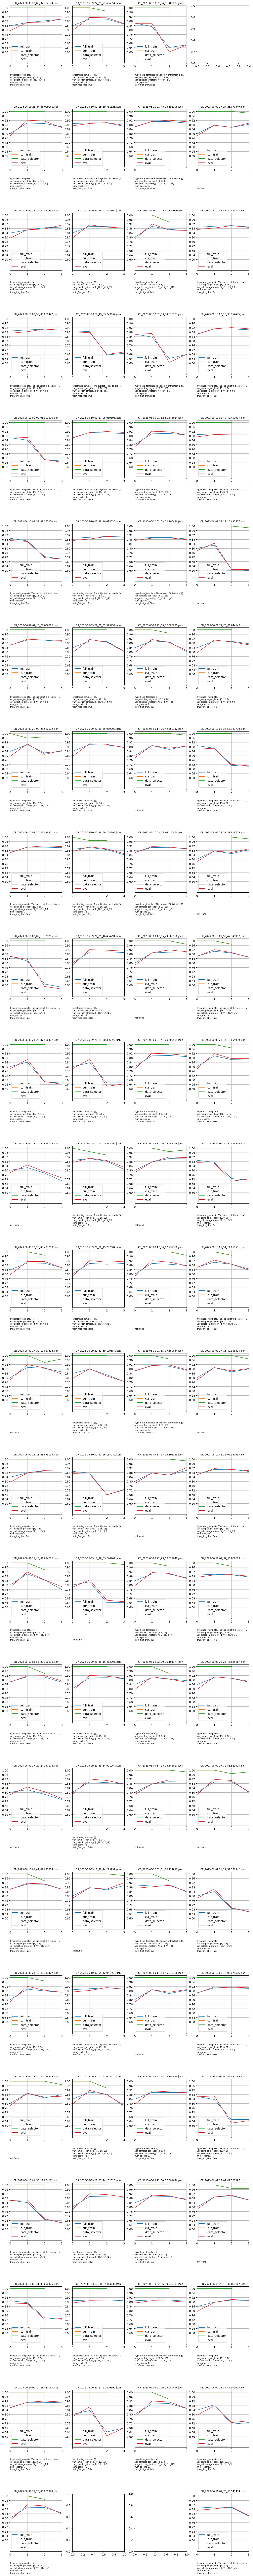

In [444]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
exp_name = 'CR'
df_metrics_dataset = df_metrics[df_metrics['experiment_name'].str.contains(exp_name)].reset_index(drop=True)

import re


number_of_subplots=len(df_metrics_dataset)
print(number_of_subplots)
n_cols=4
n_linhas = round(number_of_subplots/n_cols)
print(n_linhas)
lin=0
col=0
fig,ax = subplots(n_linhas+1,n_cols,figsize=(12,8))
subplots_adjust(left=3,right=4,bottom=8,top=24,hspace=0.8)


for exp in range(len(df_metrics_dataset)):
    this_df = df_metrics_dataset.loc[exp]
    r = re.search(re.compile(r'_\d{1}.{20,30}.json'),this_df['experiment_name'])
    r = exp_name+"_hyperparameters"+r[0]

    try:
        f = open(path_to_json+ r,'r')
        hyperparams = ((json.load(f)))

    except:
        print(f"File {r} not found")
        hyperparams = None
    if pd.isna(this_df['full_train_trained_first_shot:']): ### plot only trained first shot, if trained. Else plot raw first shot
        this_df = this_df.drop(index=['full_train_trained_first_shot:','eval_trained_first_shot'])
    else:
        this_df = this_df.drop(index=['full_train_raw_first_shot','eval_trained_first_shot'])

    data_selector_cols = [col for col in this_df.index if 'data_selector' in col]
    cur_train_cols = [col for col in this_df.index if 'cur_train' in col]
    full_train_cols = [col for col in this_df.index if 'full_train' in col]
    eval_cols = [col for col in this_df.index if ('eval' in col and 'eval_trained_first_shot' not in col)]

    df_plot = this_df[full_train_cols].to_list()
    x_full_train = np.arange(0,len(df_plot))
    y_full_train = df_plot
    # print(df_metrics_dataset.loc[exp].index)


    df_plot = this_df[cur_train_cols].to_list()
    x_cur_train = np.arange(0,len(df_plot))
    y_cur_train = df_plot
    # print(this_df.index)

    df_plot = this_df[data_selector_cols].to_list()
    x_data_selector = np.arange(0,len(df_plot))
    y_data_selector = df_plot
    # print(this_df.index)

    df_plot = this_df[eval_cols].to_list()
    x_eval = np.arange(0,len(df_plot))
    y_eval = df_plot

    ax[lin,col].plot(x_full_train,y_full_train)
    ax[lin,col].plot(x_cur_train,y_cur_train)
    ax[lin,col].plot(x_data_selector,y_data_selector)
    ax[lin,col].plot(x_eval,y_eval)


    ax[lin,col].legend(['full_train','cur_train','data_selector','eval'])
    ax[lin,col].set_title(df_metrics_dataset.loc[exp]['experiment_name'],size='small')
    ax[lin,col].grid(which='both')
    ax[lin,col].axis([0,3.01,0.5,1.02]) ##
    ax[lin,col].set_xticks(np.arange(0,len(y_eval)-1))
    ax[lin,col].set_yticks(np.arange(0.60,1.02,0.04))
    

    if hyperparams:
        hypothesis_template= 'hypothesis_template: '+str(hyperparams['hypothesis_template'])
        num_epochs= 'num_epochs: '+str(hyperparams['num_epochs'])
        var_samples_per_label= 'var_samples_per_label: '+str(hyperparams['var_samples_per_label'])
        var_selection_strategy= 'var_selection_strategy: '+str(hyperparams['var_selection_strategy'])
        train_first_shot= 'train_first_shot: '+str(hyperparams['train_first_shot'])

        hyperparam_text = ",\n".join([(hypothesis_template),(var_samples_per_label),(var_selection_strategy),(num_epochs),(train_first_shot)])
        hyperparam_text = hyperparam_text.replace("top_n","t_N").replace("intraclass_clustering","ic")
    else:
        hyperparam_text = "not found"
    ax[lin,col].text(y= 0.3, s=hyperparam_text, x=0,size='x-small')
    col = col+1 if col<n_cols-1 else 0
    lin = lin if col<n_cols-1 else lin+1


plt.show()

# AG News

40
10


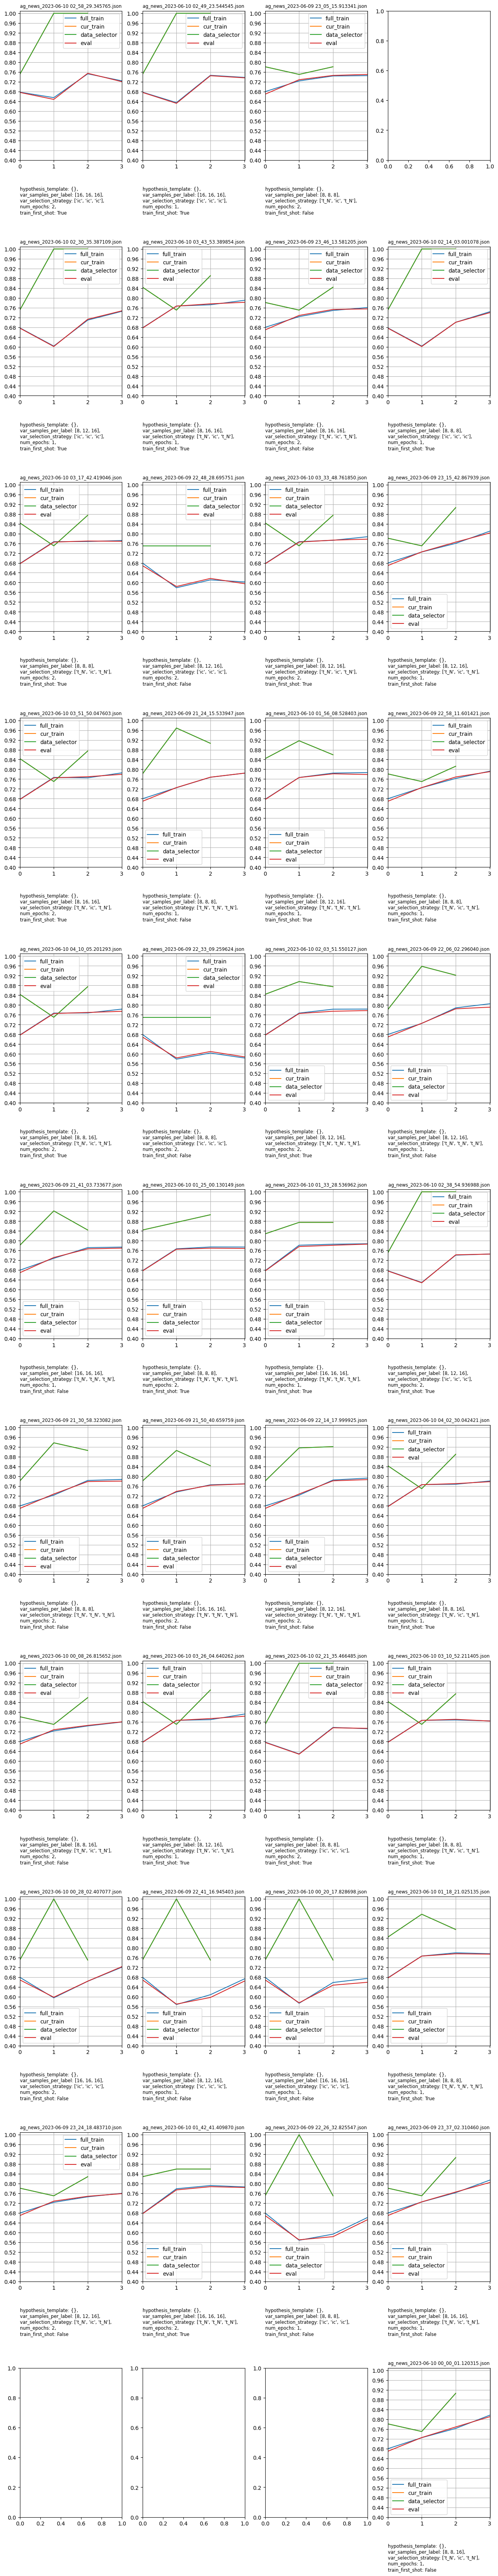

In [438]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
exp_name = 'ag_news'
df_metrics_dataset = df_metrics[df_metrics['experiment_name'].str.contains(exp_name)].reset_index(drop=True)

import re


number_of_subplots=len(df_metrics_dataset)
print(number_of_subplots)
n_cols=4
n_linhas = round(number_of_subplots/n_cols)
print(n_linhas)
lin=0
col=0
fig,ax = subplots(n_linhas+1,n_cols,figsize=(12,8))
subplots_adjust(left=3,right=4,bottom=8,top=16,hspace=0.58)


for exp in range(len(df_metrics_dataset)):
    this_df = df_metrics_dataset.loc[exp]
    r = re.search(re.compile(r'_\d{1}.{20,30}.json'),this_df['experiment_name'])
    r = exp_name+"_hyperparameters"+r[0]

    try:
        f = open(path_to_json+ r,'r')
        hyperparams = ((json.load(f)))

    except:
        print(f"File {r} not found")
        hyperparams = None
    if pd.isna(this_df['full_train_trained_first_shot:']): ### plot only trained first shot, if trained. Else plot raw first shot
        this_df = this_df.drop(index=['full_train_trained_first_shot:','eval_trained_first_shot'])
    else:
        this_df = this_df.drop(index=['full_train_raw_first_shot','eval_trained_first_shot'])

    data_selector_cols = [col for col in this_df.index if 'data_selector' in col]
    cur_train_cols = [col for col in this_df.index if 'cur_train' in col]
    full_train_cols = [col for col in this_df.index if 'full_train' in col]
    eval_cols = [col for col in this_df.index if ('eval' in col and 'eval_trained_first_shot' not in col)]

    df_plot = this_df[full_train_cols].to_list()
    x_full_train = np.arange(0,len(df_plot))
    y_full_train = df_plot
    # print(df_metrics_dataset.loc[exp].index)


    df_plot = this_df[cur_train_cols].to_list()
    x_cur_train = np.arange(0,len(df_plot))
    y_cur_train = df_plot
    # print(this_df.index)

    df_plot = this_df[data_selector_cols].to_list()
    x_data_selector = np.arange(0,len(df_plot))
    y_data_selector = df_plot
    # print(this_df.index)

    df_plot = this_df[eval_cols].to_list()
    x_eval = np.arange(0,len(df_plot))
    y_eval = df_plot

    ax[lin,col].plot(x_full_train,y_full_train)
    ax[lin,col].plot(x_cur_train,y_cur_train)
    ax[lin,col].plot(x_data_selector,y_data_selector)
    ax[lin,col].plot(x_eval,y_eval)


    ax[lin,col].legend(['full_train','cur_train','data_selector','eval'])
    ax[lin,col].set_title(df_metrics_dataset.loc[exp]['experiment_name'],size='small')
    ax[lin,col].grid(which='both')
    ax[lin,col].axis([0,3.01,0.5,1.01]) ##
    ax[lin,col].set_xticks(np.arange(0,len(y_eval)-1))
    ax[lin,col].set_yticks(np.arange(0.40,1.001,0.04))
    

    if hyperparams:
        hypothesis_template= 'hypothesis_template: '+str(hyperparams['hypothesis_template'])
        num_epochs= 'num_epochs: '+str(hyperparams['num_epochs'])
        var_samples_per_label= 'var_samples_per_label: '+str(hyperparams['var_samples_per_label'])
        var_selection_strategy= 'var_selection_strategy: '+str(hyperparams['var_selection_strategy'])
        train_first_shot= 'train_first_shot: '+str(hyperparams['train_first_shot'])

        hyperparam_text = ",\n".join([(hypothesis_template),(var_samples_per_label),(var_selection_strategy),(num_epochs),(train_first_shot)])
        hyperparam_text = hyperparam_text.replace("top_n","t_N").replace("intraclass_clustering","ic")
    else:
        hyperparam_text = "not found"
    ax[lin,col].text(y= 0.18, s=hyperparam_text, x=0,size='small')
    col = col+1 if col<n_cols-1 else 0
    lin = lin if col<n_cols-1 else lin+1


plt.show()

NameError: name 'xrange' is not defined

<Figure size 640x480 with 0 Axes>

[0.  0.1 0.2]


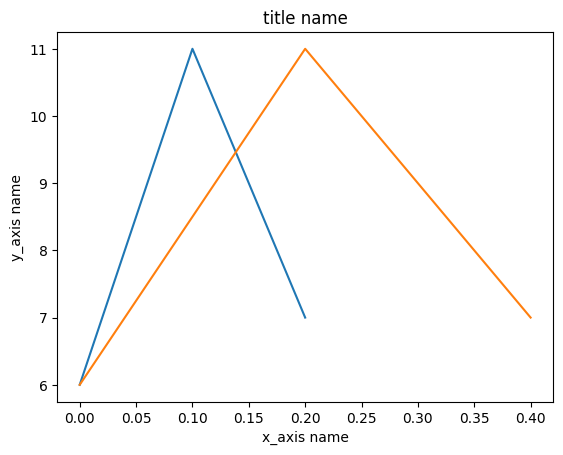

In [42]:

x_axis = np.arange(0,0.3,0.1)
x2_axis = np.arange(0,0.6,0.2)
print(x_axis)
y_axis = [6, 11, 7]

plt.plot(x_axis, y_axis)
plt.plot(x2_axis, y_axis)

plt.title('title name')
plt.xlabel('x_axis name')
plt.ylabel('y_axis name')
plt.show()